In [4]:
import pandas as pd
import numpy as np
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestClassifier

In [5]:
cmpny_data=pd.read_csv('Company_Data.csv')
cmpny_data.head()

,Sales,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US
0,9.50,138,73,11,276,120,Bad,42,17,Yes,Yes
1,11.22,111,48,16,260,83,Good,65,10,Yes,Yes
2,10.06,113,35,10,269,80,Medium,59,12,Yes,Yes
3,7.40,117,100,4,466,97,Medium,55,14,Yes,Yes
4,4.15,141,64,3,340,128,Bad,38,13,Yes,No


In [6]:
c_data=cmpny_data.drop('Sales',axis=1)
c_data

,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US
0,138,73,11,276,120,Bad,42,17,Yes,Yes
1,111,48,16,260,83,Good,65,10,Yes,Yes
2,113,35,10,269,80,Medium,59,12,Yes,Yes
3,117,100,4,466,97,Medium,55,14,Yes,Yes
4,141,64,3,340,128,Bad,38,13,Yes,No
...,...,...,...,...,...,...,...,...,...,...
395,138,108,17,203,128,Good,33,14,Yes,Yes
396,139,23,3,37,120,Medium,55,11,No,Yes
397,162,26,12,368,159,Medium,40,18,Yes,Yes
398,100,79,7,284,95,Bad,50,12,Yes,Yes


In [7]:
company_data=pd.DataFrame(pd.cut(cmpny_data.Sales,bins=3,labels=['Low','Medium','High']))
company_data

,Sales
0,Medium
1,High
2,Medium
3,Medium
4,Low
...,...
395,High
396,Medium
397,Medium
398,Medium


In [8]:
Company_Data=pd.concat([c_data,company_data],axis=1)
Company_Data.head()

,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US,Sales
0,138,73,11,276,120,Bad,42,17,Yes,Yes,Medium
1,111,48,16,260,83,Good,65,10,Yes,Yes,High
2,113,35,10,269,80,Medium,59,12,Yes,Yes,Medium
3,117,100,4,466,97,Medium,55,14,Yes,Yes,Medium
4,141,64,3,340,128,Bad,38,13,Yes,No,Low


In [9]:
data_category=Company_Data.select_dtypes(exclude=[np.number]).columns
data_category

Index(['ShelveLoc', 'Urban', 'US', 'Sales'], dtype='object')

In [10]:
Company_Data[data_category].head()

,ShelveLoc,Urban,US,Sales
0,Bad,Yes,Yes,Medium
1,Good,Yes,Yes,High
2,Medium,Yes,Yes,Medium
3,Medium,Yes,Yes,Medium
4,Bad,Yes,No,Low


In [11]:
from sklearn.preprocessing import LabelEncoder
labelEncoder=LabelEncoder()
for i in data_category:
    Company_Data[i]=labelEncoder.fit_transform(Company_Data[i])

In [12]:
Company_Data.head()

,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US,Sales
0,138,73,11,276,120,0,42,17,1,1,2
1,111,48,16,260,83,1,65,10,1,1,0
2,113,35,10,269,80,2,59,12,1,1,2
3,117,100,4,466,97,2,55,14,1,1,2
4,141,64,3,340,128,0,38,13,1,0,1


In [13]:
x=Company_Data.iloc[:,0:10]
y=Company_Data.iloc[:,10]

In [14]:
num_trees = 100
max_features = 6
kfold = KFold(n_splits=10)

model = RandomForestClassifier(n_estimators=num_trees, max_samples=0.8,max_features=max_features,random_state=8)
results = cross_val_score(model, x, y, cv=kfold)
print(results.mean()*100)

73.5


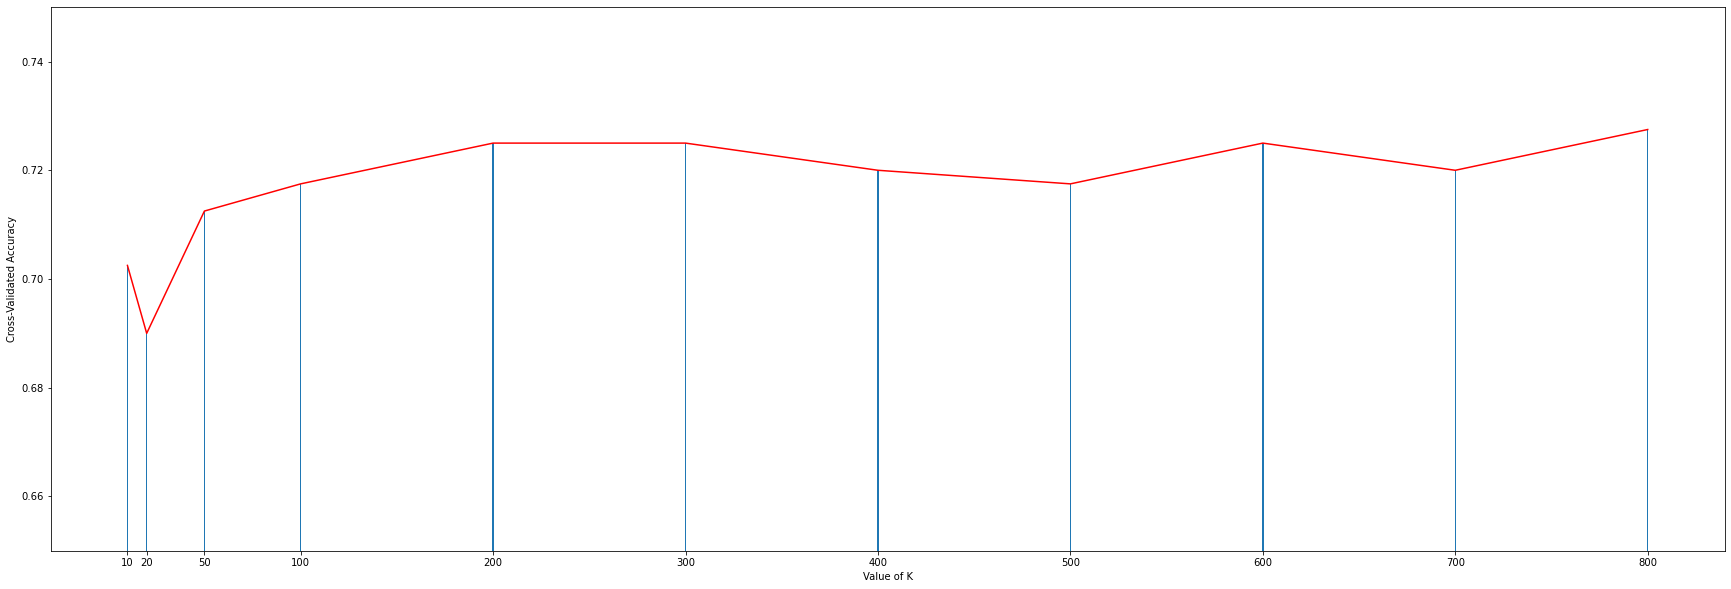

In [17]:
import matplotlib.pyplot as plt 
%matplotlib inline
k_range = [10,20,50,100,200,300,400,500,600,700,800]
k_scores = []
array = Company_Data.values

x = array[:,0:10]
y = array[:,10]

for k in k_range:
    rf = RandomForestClassifier(n_estimators=k)
    scores = cross_val_score(rf, x, y, cv=10)
    k_scores.append(scores.mean())

plt.figure(figsize=(30,10))
plt.bar(k_range, k_scores)
plt.plot(k_range, k_scores,color="red")

plt.xlabel('Value of K')
plt.ylabel('Cross-Validated Accuracy')
plt.xticks(k_range)
plt.ylim(0.65,0.75)
plt.show()

In [16]:
k_scores

[0.6924999999999999,
 0.6849999999999999,
 0.72,
 0.715,
 0.7250000000000001,
 0.7275000000000001,
 0.7225,
 0.7225,
 0.7224999999999999,
 0.7100000000000001,
 0.705]